# Theory of Learning

- Author: Kaushal Bhavsar
- LinkedIn : https://www.linkedin.com/in/kb07/
- Github: Mister-kaushalam

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import math
import random
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd
from sklearn.neural_network import MLPClassifier
import csv

C:\Users\kaush\AppData\Local\Temp\ipykernel_43172\1952445828.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### how a perceptron can be used to classify two objects given their circumference and weight?

Let's take an example of classifying Apples and grapes. Both classses would have different cicumfrence and weights i.e. the features in the x  (let's say x is circumference) and y (let's say y is weight) dimentions would be linear separable. Hence, we can implement perceptron to classify them with confidence.

With the features forming the **input space**, we'll implement the perceptron to linearly classify the dataset. We'll try to define an **unkown target function** that maps the input features to the desiered **output space** (which in our case is apples and grapes). Together the input space and the outspace makes up our **dataset**.

Our **hypothysis set** will comprise of different weight values and biases that the model will use to maps the given inputs to the outputs. The model, perceptron, will update the weights through a learning process to minizime the **error measure**. It'll keep on adjusting it untill its either able to correctly classify the data or until it reaches the number of "adjusting iterations" defined by us.

Once the weights are adjusted and the model have defined an hypothsis that minimizes the error measure, we'll have our **final hypothesis"**. The final hypothesis is the decision boundry that separates our two classes in the input space. We can quantify the discrepancy between the predicted and actual labels classes in the dataset using the error measure.

The **in-sample error** refers to the error that's calculated on the training dataset. That's used to showcase how the perceptron is performing on the examples it has seen. This is calculated during the learning. The **out-of-sample error** checks the performance of the model on the unseen data.


# learning curves that plot the performance of a model (both in-sample as well as out-of-sample)
Learning curves allow us to look at the impact that the size of the training data set N has on the ability to keep the difference between $E_{in}$ and $E_{out}$ small.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    #plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_errors = 1- train_scores
    test_errors = 1-test_scores

    train_errors_mean = np.mean(train_errors, axis=1)
    train_errors_std = np.std(train_errors, axis=1)
    test_errors_mean = np.mean(test_errors, axis=1)
    test_errors_std = np.std(test_errors, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_errors_mean - train_errors_std,
                     train_errors_mean + train_errors_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_errors_mean - test_errors_std,
                     test_errors_mean + test_errors_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_errors_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_errors_mean, 'o-', color="g",
             label="Test error")


    plt.legend(loc="best")
    return plt

In [4]:
data = np.loadtxt("/content/Et1_Task2.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

## Logistic regression learning curve

In [5]:
cv = ShuffleSplit(n_splits=25, test_size=0.2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

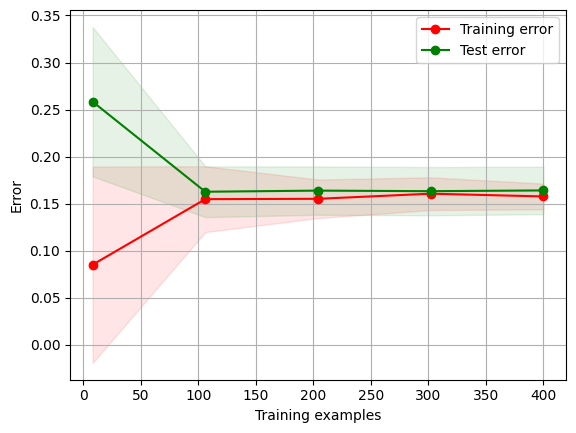

In [9]:
estimator = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

In [10]:
estimator

LogisticRegression(multi_class='multinomial', random_state=0)

## Neural net learning curves

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

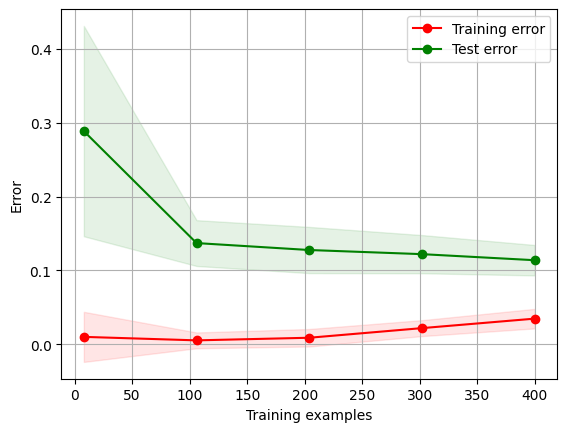

In [7]:
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(200, 4), random_state=1)
plot_learning_curve(estimator, "title", X, y, cv=cv, n_jobs=4, train_sizes = np.linspace(0.01, .5, 5))

In [8]:
estimator

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(200, 4), random_state=1,
              solver='lbfgs')

## Discussions
Describing the results of the two learning curves and explaining the differences in terms of what we currently understand about the relationship between $E_{in}$ and $E_{out}$ and the number of training samples:

- Why the training error is (generally) lower than the test error
- Why the training error increases as the number of training samples is increased
- Which of the two models is the more complex model

1. The training error is generally lower than the test error throughout the learning process. This is an expected behaviour as the model is trained on the given data and it's adjusts it's weights to produce an hypothesis which adapts at predicting the target class based on the training data. On the other hand, the model performs much worse on the test data as it has not observed that data during the training. The final hypothesis or the decision boundry is independent of the "unseen" data. The unseen data can, sometimes, introduce anomaly featurees that can further increase the error.

    > Interestingly, the Logistic regression model's test and train error has relatively small difference compared to the neural network model (multi-layered perceptron). This is because the MLP is a complex model which can also capture the non-linear relationship in the data. The logistic model, on the other hand, creates a linear decision boundry. Hence, the difference in the train and test error is larger in MLP than in the logistic regression model.

2. As the number of traninng samples increases, the training error trends to increase. The model can easily fit the hypothesis on limited data but with increase in data, we can expect more mis-classified points due to much wider distribution of new training data. We can also expect some anomalies in the new data which increases the error.

3. As mentioned above, the MLP or Neural Network model is a much complex model as it has multiple layers and nodes whereas the logistic regression model works on weighted sum of the inputs. The MLP can learn more complex relationships while logistic regression can only create a linear decision boundry.

#  impact of the loss/error function on your model

Below functions implement linear regression in a closed form (one-step solution using the pseudo-inverse).

In [31]:
def linreg_weights(X,y):
    '''Returns the weight vector associated with the regression line that best describes the data X,y in an MSE fashion '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)
    # Calculation of weights using pseudo-inverse.
    return np.linalg.inv((X.T.dot(X))).dot(X.T).dot(y)

In [32]:
def linreg_predict(w,X):
    ''' Returns a prediction y for data point X for a linear regression described by weights w '''
    # add bias 1 to inputs X
    X = np.concatenate((np.ones((X.shape[0],1)),X.reshape(X.shape[0],X.shape[1])),axis=1)

    # Calculation of outputs given weights and data (X).
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [73]:
def calc_error(w,X,y):
    '''
    This function calculates the mean-sqaured error for linear regression
    '''

    preds = linreg_predict(w, X)
    errorsSqaured = np.square(preds - y)
    MSE = np.mean(errorsSqaured)

    return MSE

#### mathematical function of the regression lines in terms of the weights found by the linear regression algorithm.

$Y = w_0 + w_1 \cdot X$

Where $w_0$ is the bais term, $w_1$ is the weight for the feature X and Y is the predicted output.

In [52]:
#reading the data
data = np.loadtxt("/content/Et1_Task3a.csv", delimiter=",")

In [57]:
#loading the data points
X = data[:, 0:1]
y = data[:, 1]

In [85]:
#calculating the weights for the data
weights = linreg_weights(X, y)
print(weights)

[0.37569601 0.51050541]


Now our mathematical function for the regression line is terms of weights is:

$ Y = 0.51050541 \cdot X + 0.37569601$

In [86]:
#regression line
regression_line = weights[1]*X + weights[0]

#getting the predictions
preds = linreg_predict(weights, X)

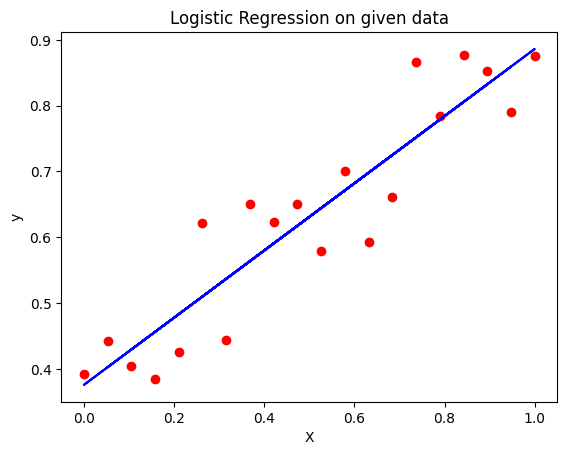

In [69]:
#Plot the regression line together with the data.
plt.scatter(X, y, color="red")
plt.plot(X, regression_line, color = 'blue')
plt.title("Logistic Regression on given data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [76]:
#Quantifying the error with the created error function
error = calc_error(weights, X, y)
print(f"Error is {error}")

Error is 0.004281801813255596


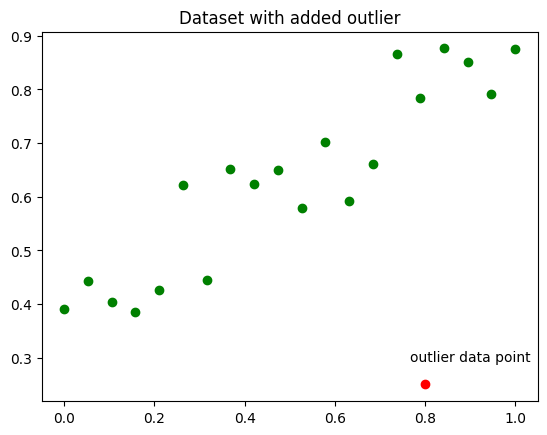

In [82]:
#adding an anomaly (outlier)
X_with_outlier = np.append(X,[[0.8]], axis=0)
y_with_outlier = np.append(y,[0.25])

plt.scatter(X,y, color="green")
plt.scatter([[0.8]], [0.25], color="red")
plt.text(0.9, 0.3, 'outlier data point',
     horizontalalignment='center',
     verticalalignment='center')
plt.title("Dataset with added outlier")
plt.show()

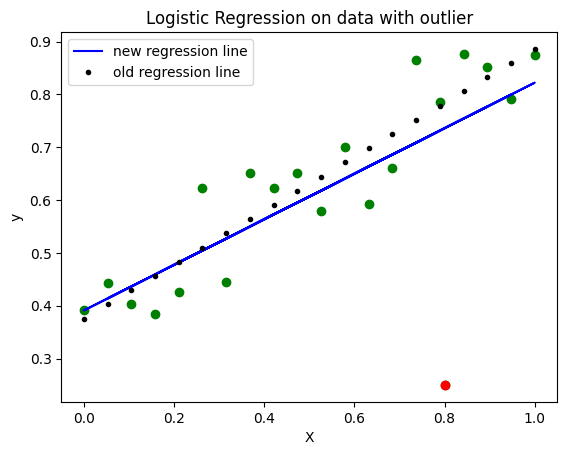

In [105]:
#implementing linear regression to the new dataset with outlier
weights = linreg_weights(X_with_outlier, y_with_outlier)
regression_line_new = weights[1]*X_with_outlier + weights[0]
preds = linreg_predict(weights, X_with_outlier)

#Plot the regression line together with the data.
plt.scatter(X_with_outlier, y_with_outlier, color="green")
plt.plot(X_with_outlier, regression_line_new, color = 'blue', label="new regression line")
plt.plot(X, regression_line, ".",color = 'black', label="old regression line")
plt.scatter([[0.8]], [0.25], color="red")
plt.title("Logistic Regression on data with outlier")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc="upper left")
plt.show()

> we can clearly see that the regression line was shifted toward the outlier

##  Discussions
Discussing the results and answer the following questions:
1. Which data point adds the biggest error term to the optimised error function?
2. How does the error contributed by this point relate to its distance from the regression line/function?
3. How do outliers effect linear regression and why?
4. Under what circumstances will linear regression with a squared error measure be a good model?

1. The outlier data point (manualy added one) added the biggest error term to the optimized error function. Talking mean squared error compared to mean error penalizes the model even more as the errors are squared.

2. The error contributed by the outlier data point is the sqaured of the actual vertical distance from the regression line. This is because we are using mean squared error as the error measure

3. The linear regression tries to minimize the error, therefore, the outliers can pull the regression line towards them.

4. From the exercise above, we have observed that the linear regression with sqaured error is a good model when the data have linear relationship between the features and target variables and there are no significant outliers.

## Summarising my understanding of how the Hoeffding bound, the concept of 'shattering', break points and the growth function inform the VC bound for a binary classifier. 

Also discussing how this relates to the general rule of thumb in machine learning that one needs a number of data points at least equal to 10 times the VC bound.

1. Hoeffding bound: It bounds the probability of different of in-sample error and out-sample error being greter than a uder defined epsilon. It provides a probabilistic assurance of the similarity between Ein and Eout as the number of data points (N) increases. This is the basis of our VC bound derivation

2. Shattering: When we understand that there are infinite number of possible hypotheses that we can fit over a data, the hoeffding bound becomes invalid. To resolve that we firstly limit the number of possible hypotheses by combining the similar hypotheses (the ones that have the same classification of the data points, i.e. no data point is classified differently). These hypothese are called dichotomies and the ability of a hypothesis set to classify all possible dichotomies of the data points is called shattering. So, we use concept of shattering to reduce the possible hypotheses on the right side of the hoeffding equation.

3. Break points and growth functions: The point where the hypotheses fails to shatter the data is called a breakpoint. Growth function represents number of effective hypotheses for a given data sample. As the number of data points increases, the growth function increases slower. Hence, we have limited the right side of equation even further by replacing the numnber of possible hypotheses by the growth function.

The VC dimention can be used to measure the model complexity. The VC bound indicates the number of data points (N) should be atleast 10 times the VC dimention to make sure that the model we have good generalization i.e. out-sample error is somewhere close to in-sample error.




## understanding of the approximation-generalisation trade-off in terms of complexity, bias and variance of a model, and the resulting under/overfitting given the available data. 

The approximation-generalization trade off in machine learning allows us to understand how do manage the bias, variance and complexity to fit a optimized model on a dataset. Our aim is to create a model that is niether too complex nor too simple. The simpler the model is, the more prone it is to underfitting and the more complex the model is, the more it can overfit the data.

As we looked at the equation in the provided material, the first half of the equation tells us the bias of the model ( $Ex[(\bar{g}(x)-f(x))^2]$ ). The bais is the error due to the model not being capable to model the underlying function. High bais suggests that the model is too simplistic which mean that model can be underfitting the data. Variance is the how sensitive the model is to the fluctuation in data. High variance mean the model is too sensituve to the outliers in the data, resulting in overfitting.

Our goal is to maintain a balance between both, bais and variance, for an optimal model.


## Demonstration of effect of outlier on logistic regression decision boundary for comparision with linear classification

Below code demonstrates the effect of an outlier on the decision boundary chosen by logistic regression. You can use this code to compare the effect of outliers in a classification algorithm using mean square error as the error measure with that in a classification algorithm using log likelihood as the error measure. Moreover, below code provides some good hints for plotting the decision boundary in task 3b :-).

Load data:

In [ ]:
data = np.loadtxt("Et1_Task3b.csv", delimiter=",")
X = data[:,0:2]
y=data[:,2]

Fit model:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

Extract weights from model:

In [ ]:
w_lr = estimator.intercept_
w_lr=np.append(w_lr, estimator.coef_)
w_lr

Add outlier:

In [ ]:
X = np.append(X,[[-2,6]], axis=0)
y = np.append(y,[1],axis=0)

Fit model with outlier:

In [ ]:
estimator = LogisticRegression(solver='lbfgs')
estimator.fit(X,y)
estimator.score(X,y)

Extract new weight vector from model:

In [ ]:
w_lr_2 = estimator.intercept_
w_lr_2=np.append(w_lr_2, estimator.coef_)
w_lr_2

Plot original and new decision boundary using weight vectors. Decision boundary is defined by equation: $w_0+x_0\cdot w_1+x_1 \cdot w_2=0 \rightarrow x_2 = -\frac{w_0}{w_2}-x_1\frac{w_1}{w_2}$

In [ ]:
y_p = estimator.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.plot([-2,2],[-w_lr[0]/w_lr[2]+w_lr[1]/w_lr[2]*2,-w_lr[0]/w_lr[2]-w_lr[1]/w_lr[2]*2],'b',label="original data")
plt.plot([-2,2],[-w_lr_2[0]/w_lr_2[2]+w_lr_2[1]/w_lr_2[2]*2,-w_lr_2[0]/w_lr_2[2]-w_lr_2[1]/w_lr_2[2]*2],'r',label='data with outlier')

plt.title("Data with outlier classified with logistic regression")
plt.legend(loc="upper right")
plt.show()
1-sum(abs(y_p-y))/len(y)